## Importing Data and Analysing data using Multiple Regression Model 

In [77]:
!pip install scikit-learn

In [90]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import sklearn
%matplotlib inline

In [79]:
df = pd.read_csv("cpcb_dly_aq_tamil_nadu-2014.csv")
df = df.rename(columns={'RSPM/PM10': 'RSPMorPM10'})
df


,Stn Code,Sampling Date,State,City/Town/Village/Area,Location of Monitoring Station,Agency,Type of Location,SO2,NO2,RSPMorPM10,PM 2.5
0,38,01-02-2014,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,11.0,17.0,55.0,NaN
1,38,01-07-2014,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,13.0,17.0,45.0,NaN
2,38,21-01-2014,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,12.0,18.0,50.0,NaN
3,38,23-01-2014,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,15.0,16.0,46.0,NaN
4,38,28-01-2014,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,13.0,14.0,42.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2874,773,12-03-2014,Tamil Nadu,Trichy,"Central Bus Stand, Trichy",Tamilnadu State Pollution Control Board,"Residential, Rural and other Areas",15.0,18.0,102.0,NaN
2875,773,12-10-2014,Tamil Nadu,Trichy,"Central Bus Stand, Trichy",Tamilnadu State Pollution Control Board,"Residential, Rural and other Areas",12.0,14.0,91.0,NaN
2876,773,17-12-2014,Tamil Nadu,Trichy,"Central Bus Stand, Trichy",Tamilnadu State Pollution Control Board,"Residential, Rural and other Areas",19.0,22.0,100.0,NaN
2877,773,24-12-2014,Tamil Nadu,Trichy,"Central Bus Stand, Trichy",Tamilnadu State Pollution Control Board,"Residential, Rural and other Areas",15.0,17.0,95.0,NaN


## Identifying Nan and Missing values and filling them 

In [80]:
nullnum = df.isnull()
print(nullnum)

      Stn Code  Sampling Date  State  City/Town/Village/Area  \
0        False          False  False                   False   
1        False          False  False                   False   
2        False          False  False                   False   
3        False          False  False                   False   
4        False          False  False                   False   
...        ...            ...    ...                     ...   
2874     False          False  False                   False   
2875     False          False  False                   False   
2876     False          False  False                   False   
2877     False          False  False                   False   
2878     False          False  False                   False   

      Location of Monitoring Station  Agency  Type of Location    SO2    NO2  \
0                              False   False             False  False  False   
1                              False   False             False  False  

In [81]:
total_null_values = df.isnull().sum().sum()
print("Total number of null values:", total_null_values)

Total number of null values: 2907


In [82]:
df.fillna(0)

,Stn Code,Sampling Date,State,City/Town/Village/Area,Location of Monitoring Station,Agency,Type of Location,SO2,NO2,RSPMorPM10,PM 2.5
0,38,01-02-2014,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,11.0,17.0,55.0,0.0
1,38,01-07-2014,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,13.0,17.0,45.0,0.0
2,38,21-01-2014,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,12.0,18.0,50.0,0.0
3,38,23-01-2014,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,15.0,16.0,46.0,0.0
4,38,28-01-2014,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,13.0,14.0,42.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2874,773,12-03-2014,Tamil Nadu,Trichy,"Central Bus Stand, Trichy",Tamilnadu State Pollution Control Board,"Residential, Rural and other Areas",15.0,18.0,102.0,0.0
2875,773,12-10-2014,Tamil Nadu,Trichy,"Central Bus Stand, Trichy",Tamilnadu State Pollution Control Board,"Residential, Rural and other Areas",12.0,14.0,91.0,0.0
2876,773,17-12-2014,Tamil Nadu,Trichy,"Central Bus Stand, Trichy",Tamilnadu State Pollution Control Board,"Residential, Rural and other Areas",19.0,22.0,100.0,0.0
2877,773,24-12-2014,Tamil Nadu,Trichy,"Central Bus Stand, Trichy",Tamilnadu State Pollution Control Board,"Residential, Rural and other Areas",15.0,17.0,95.0,0.0


In [83]:
cdf = df[['SO2','NO2','RSPMorPM10']]
cdf.head(9)

,SO2,NO2,RSPMorPM10
0,11.0,17.0,55.0
1,13.0,17.0,45.0
2,12.0,18.0,50.0
3,15.0,16.0,46.0
4,13.0,14.0,42.0
5,14.0,18.0,43.0
6,12.0,17.0,51.0
7,13.0,16.0,46.0
8,10.0,19.0,50.0


## Train Data set and its distirbution

In [84]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

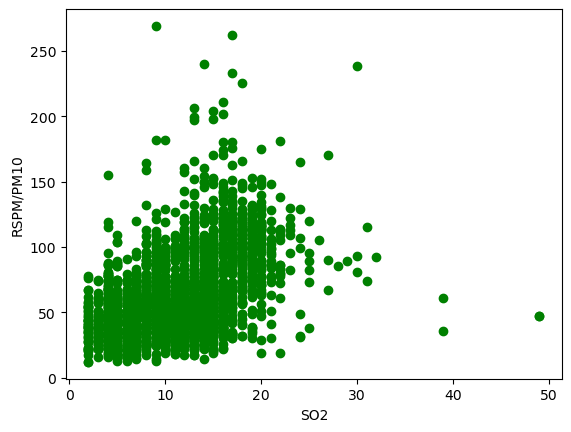

In [93]:
plt.scatter(cdf.SO2,cdf.RSPMorPM10,color = 'green')
plt.xlabel("SO2")
plt.ylabel("RSPM/PM10")
plt.show()

# Creating A train and test Dataset 

In [86]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train = train.dropna()
x = np.asanyarray(train[['SO2', 'NO2']])
y = np.asanyarray(train[['RSPMorPM10']])
regr.fit(x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[2.91030139 0.16573836]]


In [87]:
test = test.dropna()
y_hat= regr.predict(test[['SO2','NO2']])
x = np.asanyarray(test[['SO2','NO2']])
y = np.asanyarray(test[['RSPMorPM10']])
print("Mean Squared Error (MSE) : %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Mean Squared Error (MSE) : 701.16
Variance score: 0.11


C:\Users\savio\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
